# STAT 207: Generating Random Deviates


Monte Carlo methods are computational techniques used to solve problems and make probabilistic predictions by generating random samples. These methods rely on the principle of statistical sampling to approximate solutions or estimate quantities that are difficult or intractable to compute analytically.

The name "Monte Carlo" is derived from the famous Monte Carlo Casino in Monaco, known for its games of chance and randomness. 

- Integration

- Simulation

- Optimization

- MCMC

## Random Number Generators

- A multiplicative random number generator
$$
I_{n+1} = mI_n \mod{p},
$$
with a large prime number $p$ and the multiplier $m$ between 2 and $p-1$.

- For example, the Mersenne prime $p = 2^{31} − 1 = 214,783,647$ is the most widely used modulus.

- The function $I = mI \mod{p}$ maps the set $\{1,..,p-1\}$ onto itself.

- The **period** $n$ of the generator is the minimal positive number such that $m^n = 1\mod{p}$.
$$
I_{n} = m^n \mod{p} = I_0 \mod{p}.
$$

- Fermat’s little theorem says that $m^{p−1} = 1mod p$. For $m$ that $n = p-1$ are called primitive. For example, $m = 7^5 = 16807$ is primitive.

- The generator
$$
I_{n+1} = 7^5 I_n \mod{2^{31} − 1},
$$
can be used to generate a real number on $(0,1)$ by dividing the output by $2^{31} − 1$.


## The Inverse Method

- To generate non-uniform random deviates,

**Proposition 22.3.1** Let $X$ be a random variable with distribution function $F(x)$.

(a) If $F(x)$ is continuous, then $U = F(X)$ is uniformly distributed on $[0, 1]$.

(b) Even if $F(x)$ is not continuous, the inequality $Pr[F(X) \leq t] \leq t$ is still true for all $t \in [0, 1]$.

(c) If $F^{-1}(y) = \inf\{x : F(x) \leq y\}$ for any $0 < y < 1$, and if $U$ is uniform on $[0, 1]$, then $F^{-1}(U)$ has distribution function $F(x)$.

- Example: exponential distribution. If $X$ is exponentially distributed with mean 1, then $F(x) = 1 − e^{−x}$,

\vspace{25mm}


- Example: Cauchy distribution. $F(x) = 1/2 + arctan(x)/\pi$,

\vspace{25mm}

- Example: Geometric distribution. The number of trials $N$ until the first success in a Bernoulli sampling scheme with success probability $p$. Choose $\lambda$ such that $q = 1-p = e^{-\lambda}$, and take $N = \lfloor X\rfloor + 1$, where $X$ is exponentially distributed with intensity $\lambda$.

\vspace{25mm}

## Normal Random Deviates

- **Box and Muller method**: Transformation between Cartesian coordinates $(X,Y)$ and polar coordinates $(\Theta, R)$, assuming $X$ and $Y$ are two independent standard normal deviates.

- From the joint density $e^{-\frac{r^2}{2}}r/(2\pi)$, $\Theta$ and $R$ are independent with $\Theta$ uniformly distributed on $[0,2\pi]$ and $R^2$ exponentially distributed with mean 2.

- $\Theta = 2\pi U$ and $R^2 = -2\ln V$.

- Lastly, $X = R\cos \Theta$ and $Y = R\sin \Theta$.

- **Marsaglia’s polar method**: 

    - Sample a random point $(U, V)$ in the unit square,
    
    - Transform to $S = 2U-1$ and $T = 2V-1$.
    
    - If $W^2 = S^2 + T^2 >1$, discard and resample $(U, V)$.
    
    - If $W^2 = S^2 + T^2 \le 1$, let $\Theta$ be the angle with $\cos \Theta = S/W$ and $\sin \Theta = T/W$. $\Theta$ is uniformly distributed.
    
    - Let $Z = -2\ln W^2$, 
    $$
    Pr(Z\le z) = Pr(W^2 \ge e^{-z/2})  = 1 - e^{-z/2},
    $$
    which is the exponential with mean 2.
    
    - Lastly,
    $$
    X = \sqrt{-2\ln W^2} \frac{S}{W}
    $$
    
    $$
    Y = \sqrt{-2\ln W^2} \frac{T}{W}
    $$
    

## Acceptance-Rejection Method

- For a complicated probability density $f(x)$ that is majorized by a simple probability density $g(x)$ 
$$
f(x)\le cg(x) = h(x),
$$
for all $x$ and some constant $c > 1$.

- Sample a deviate $X$ by $g(x)$, and a uniform deviate $U$.

- Accept $X$ if and only if $U\le f(X)/h(X)$.

$$
\begin{aligned}
P\left( X\in (x, x+dx) \right) =& P_g\left( X\in (x, x+dx) \right)* P\left(U\le f(x)/h(x)\right)\\
 \propto & g(x)dx \frac{f(x)}{h(x)} = \frac{1}{c} f(x)dx.
\end{aligned}
$$

- $1/c$ is the acceptance rate.

- The density $g(x)$ is called the instrumental density.

- Exponential curves as majorizing functions,

    - If a density $f(x)$ is log-concave, then any line tangent to $\ln f(x)$ will lie above it.
    
    - Common log-concave densities: normal, the gamma with shape parameter $\alpha\ge 1$, the beta with parameters $\alpha$ and $\beta\ge 1$, the exponential power density, and [Fisher’s $z$ density](https://en.wikipedia.org/wiki/Fisher%27s_z-distribution).
    
    

<div>
<img src="ExpEnv.jpg" alt="Exponential Envelopes" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.75\textwidth]{ExpEnv.jpg}
\end{center}


- **Example** *Exponential Power Density*


The exponential power density
$$
f(x) = \frac{e^{-|x|^\alpha}}{2\Gamma(1 + \frac{1}{\alpha})}, \alpha \ge 1, 
$$
has mode $m = 0$. For $x_r \ge 0$, we have
$$
\begin{aligned}
\lambda_r & =\alpha x_r^{\alpha-1} \\
c_r\left(x_r\right) & =\frac{e^{(\alpha-1) x_r^\alpha}}{2 \Gamma\left(1+\frac{1}{\alpha}\right) \alpha x_r^{\alpha-1}} .
\end{aligned}
$$

The equation $\frac{d}{dx} c_r(x) = 0$ has solutions $-x_l = x_r = \alpha^{-1/\alpha}$. This allows us to calculate the acceptance probability
$$
\frac{1}{2 c_r\left(x_r\right)}=\Gamma\left(1+\frac{1}{\alpha}\right) \alpha^{\frac{1}{\alpha}} e^{\frac{1}{\alpha}-1}
$$
which ranges from $1$ at $\alpha = 1$ (the double or bilateral exponential distribution) to $e^{-1} \approx 0.368$ as $\alpha \rightarrow \infty$. 

- For a normal density ($\alpha  = 2$), the acceptance probability reduces to $\sqrt{\pi / 2e} \approx 0.76$. 

- In practical implementations, the acceptance-rejection method for normal deviates is slightly less efficient than the polar method.

In [ ]:
import numpy as np
import scipy.special

def exponential_power_density(alpha):
    def density(x):
        normalization = 1 / (2 * scipy.special.gamma(1 + 1 / alpha))
        return normalization * np.exp(-np.abs(x) ** alpha)
    return density


def generate_exponential_power(alpha):
    density = exponential_power_density(alpha)
    lam = alpha ** (1 / alpha)
    # max_density = density(1/lam)
    acceptance_prob = scipy.special.gamma(1 + 1 / alpha) * lam * np.exp(1 / alpha - 1)
    
    while True:
        x = np.random.exponential(scale = 1/lam )  # Generate candidate from exponential distribution
        u = np.random.uniform(0, 1)  # Generate uniform random number
        if u <= density(x) / (lam * np.exp(-lam * x)) * acceptance_prob:
            return x

In [14]:
# Example usage
alpha = 1.5
num_samples = 1000

samples = [generate_exponential_power(alpha) for _ in range(num_samples)]

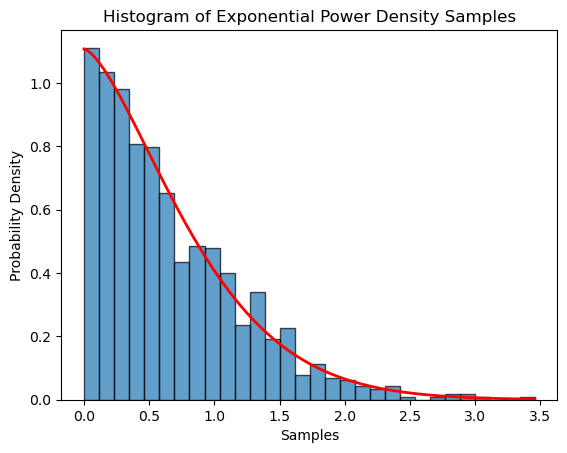

In [16]:
import matplotlib.pyplot as plt

# Plot the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.7, edgecolor='black')
# Plot true density
x = np.linspace(0, max(samples), 1000)  # Generate x values for the true density plot
density = exponential_power_density(alpha)
plt.plot(x, 2*density(x), color='red', linewidth=2, label='True Density')

plt.xlabel('Samples')
plt.ylabel('Probability Density')
plt.title('Histogram of Exponential Power Density Samples')
plt.show()

### Discrete density $f(x)$

- $f(x)$ is positive on an interval of integers.    

- Linearly interpolate ln f(x) between supporting integers.


<div>
<img src="LogPois.jpg" alt="Log Poisson" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.75\textwidth]{LogPois.jpg}
\end{center}

## Ratio Method

- For a probability density $f(x)$, let $h(x) = cf(x)$ for $c>0$. Consider the set $S_h = \{(u,v): 0<u\le \sqrt{h(v/u)} \}$.

**Proposition 22.7.1** Suppose $k_u = \sup_x \sqrt{h(x)}$ and $k_v = \sup_x |x|\sqrt{h(x)}$ are finite. Then the rectangle $[0, k_u] \times [-k_v, k_v]$ encloses $S_h$. If $h(x) = 0$ for $x < 0$, then the rectangle $[0, k_u] \times [0, k_v]$ encloses $S_h$. Finally, if the point $(U, V)$ sampled uniformly from the enclosing set falls within $S_h$, then the ratio $X = \frac{V}{U}$ is distributed according to $f(x)$.

- Example: Gamma with shape paramter $\alpha >1$ and scale parameter $\beta = 1$.

    - Take $h(x) = x^{\alpha-1} e^{-x} I(x>0)$. 
    
    - The maximum of $\sqrt{h(x)}$ occurs at $x= \alpha-1$ and equals $k_u = [(\alpha-1)/e]^{(\alpha-1)/2}$. 
    
    - The maximum of $x\sqrt{h(x)}$ occurs at $x= \alpha+1$ and equals $k_v = [(\alpha+1)/e]^{(\alpha+1)/2}$.
    
    - Sample uniformly from the rectangular region $[0, k_u] \times [0, k_v]$, i.e. $k_uU$ and $k_vV$ for uniform deviates $U$ and $V$.
    
    - $X = k_vV / k_uU$ is accepted if and only if
    $$
    k_uU \le X^{(\alpha-1)/2}e^{-X/2},
    $$
        which can be simplified with $W = X/(\alpha-1)$.
    
    

## Deviates by Definition

- The admixture distribution:

$$
F(x) = \sum_{j=1}^{k} p_jF_j(x).
$$

- Binomial: For a small number of trials $n$, a binomial deviate $S_n$ can be quickly generated by taking $n$ independent, uniform deviates $U_1, \ldots, U_n$ and setting
$$
S_n = \sum_{i=1}^{n} 1\{U_i < p\},
$$
where $p$ is the success probability per trial.

- Poisson with mean $\lambda$: Consider a Poisson process with unit rate, the number of arrivals on the interval $[0,\lambda]$ follows a Poisson distribution with mean $\lambda$.

    - The waiting times between successive arrivals are independent, exponential r.v.s with mean 1.
    
    - Generate a sequence $Z_1,Z_2,...$ and stops when $\sum_{i=1}^{j-1}Z_i \le \lambda < \sum_{i=1}^{j} Z_i$, then $X = j-1$.
    
- Chi-square

- F 

- Student’s t Distribution

- Beta


